In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import pandas as pd
from planet_cookbook import read_reports as rr
import os
import rebound
import seaborn as sns

sol_to_earth = 332946.078
G = 6.6743* 10**(-11) #N⋅m2/kg2
M_sun = 1.989e+33 #g
AU = 1.496e+13 #cm

In [47]:
params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 10,
   'xtick.labelsize': 20,
   'ytick.labelsize': 15,
   'text.usetex': True, #to use TeX in your labels
   'font.family':'serif',
   'axes.titlesize': 15
   }
rcParams.update(params)

In [48]:
#Color-blind friendly pallete
colors = [
    "#0C7BDC",  # Vibrant Blue
    "#E66100",  # Bright Orange
    "#40B0A6",  # Teal/Aqua
    "#8B8D8B",  # Medium Grey
    "#5D3A9B"   # Muted Purple
]

vib_blue = "#0C7BDC"
teal = "#40B0A6"
purple = "#5D3A9B" 

In [49]:
solar_system_df = pd.read_csv('solarsystem.csv')
mercury = solar_system_df[solar_system_df['name'] == 'Mercury']
venus = solar_system_df[solar_system_df['name'] == 'Venus']
earth = solar_system_df[solar_system_df['name'] == 'Earth']
mars = solar_system_df[solar_system_df['name'] == 'Mars']

In [50]:
ueda_v3_pldf_list = rr.get_pldfs_uniform("/Users/honeyeah/Codes/data/", "ueda_v3", "ueda_v3_", 60, 2.99e6, 0.33)
cham_cont_pldf_list = rr.get_pldfs_uniform("/Users/honeyeah/Codes/data/", "cham_cont", "cham_cont_", 60, 2.99e6, 0.33)
cham_bench_pldf_list = rr.get_pldfs_uniform("/Users/honeyeah/Codes/data/", "cham_bench", "cham_simarchive_", 60, 2.99e6, 0.33)

/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed. Binary file was saved with REBOUND Version 4.4.7. You are currently using REBOUND Version 4.4.8.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: Run

In [51]:
ueda_v3_pldf = pd.concat(ueda_v3_pldf_list)
cham_bench_pldf = pd.concat(cham_bench_pldf_list)
cham_cont_pldf = pd.concat(cham_cont_pldf_list)

In [146]:
def mercury_sim_index(masses, cmfs):
    cmf_merc =  mercury['CMF'].values[0]
    mass_merc =  mercury['m'].values[0]
    cmf_diff = np.sum((cmfs - cmf_merc)**2) / (np.average(cmfs) * len(cmfs))
    masses_diff = np.sum((masses - mass_merc)**2) / (np.average(masses) * len(masses))

    index = np.sqrt((cmf_diff + masses_diff))
    return index

def mercury_sim_index_cmf_only(cmfs):
    cmf_merc =  mercury['CMF'].values[0]
    cmf_diff = np.sum((cmfs - cmf_merc)**2) / (np.average(cmfs) * len(cmfs))

    index = np.sqrt(cmf_diff)
    return index

In [169]:
#Mercury similarity conditions
semi_lower_bound = mercury['a'].values[0] - 0.1
semi_upper_bound = mercury['a'].values[0] + 0.1

ueda_v3_mercs = ueda_v3_pldf[(ueda_v3_pldf['semi'] > semi_lower_bound) & (ueda_v3_pldf['semi'] < semi_upper_bound)]
cham_bench_mercs = cham_bench_pldf[(cham_bench_pldf['semi'] > semi_lower_bound) & (cham_bench_pldf['semi'] < semi_upper_bound)]
cham_cont_mercs = cham_cont_pldf[(cham_cont_pldf['semi'] > semi_lower_bound) & (cham_cont_pldf['semi'] < semi_upper_bound)]

In [170]:
len(cham_bench_mercs)

17

In [171]:
ueda_inds = mercury_sim_index(ueda_v3_mercs['mass'].values * sol_to_earth, ueda_v3_mercs['cmf'].values)
ueda_inds_cmf = mercury_sim_index_cmf_only(ueda_v3_mercs['cmf'].values)
print("Ueda_v3")
print("Merc similarity index, uniform = ", ueda_inds)
#print("Merc similarity index, CMF only = ", ueda_inds_cmf)

Ueda_v3
Merc similarity index, uniform =  1.0316755841929217


In [172]:
cham_bench_inds = mercury_sim_index(cham_bench_mercs['mass'].values * sol_to_earth, cham_bench_mercs['cmf'].values)
cham_bench_inds_cmf = mercury_sim_index_cmf_only(cham_bench_mercs['cmf'].values)
print("cham_bench")
print("Merc similarity index, uniform = ", cham_bench_inds)
#print("Merc similarity index, CMF only = ", cham_bench_inds_cmf)

cham_bench
Merc similarity index, uniform =  0.9859890732800812


In [173]:
cham_cont_inds = mercury_sim_index(cham_cont_mercs['mass'].values * sol_to_earth, cham_cont_mercs['cmf'].values)
cham_cont_inds_cmf = mercury_sim_index_cmf_only(cham_cont_mercs['cmf'].values)
print("cham_cont")
print("Merc similarity index, uniform = ", cham_cont_inds)
#print("Merc similarity index, CMF only = ", cham_cont_inds_cmf)

cham_cont
Merc similarity index, uniform =  0.9806954318316996


# Step funcs

In [174]:
ueda_steps = pd.read_csv("ueda_v3_grid_fulldf.csv")
cham_bench_steps = pd.read_csv("cham_bench_grid_fulldf.csv")
cham_cont_steps = pd.read_csv("cham_cont_grid_fulldf.csv")

ueda_steps_mercs = ueda_steps[(ueda_steps['semi'] > semi_lower_bound) & (ueda_steps['semi'] < semi_upper_bound)]
cham_bench_steps_mercs = cham_bench_steps[(cham_bench_steps['semi'] > semi_lower_bound) & (cham_bench_steps['semi'] < semi_upper_bound)]
cham_cont_steps_mercs = cham_cont_steps[(cham_cont_steps['semi'] > semi_lower_bound) & (cham_cont_steps['semi'] < semi_upper_bound)]

In [175]:
cham_bench_steps

,Unnamed: 0,hash,mass,cmf,tot_disk_cmf,boundary,percentage,sim_id,semi
0,0,1.000000e+00,7.842082e-07,0.431900,0.33,0.5,0.1,1,0.349708
1,1,2.000000e+00,5.796768e-07,0.557105,0.33,0.5,0.1,1,0.459960
2,2,5.000000e+00,3.638845e-06,0.290364,0.33,0.5,0.1,1,0.773525
3,3,1.200000e+01,1.267064e-06,0.384060,0.33,0.5,0.1,1,1.504560
4,4,1.140000e+02,2.800000e-08,0.297000,0.33,0.5,0.1,1,1.870077
...,...,...,...,...,...,...,...,...,...
4095,4095,1.400000e+02,2.800000e-08,0.231000,0.33,0.8,0.3,53,2.069600
4096,4096,2.875472e+09,1.500960e-08,0.000000,0.33,0.8,0.3,53,5.203767
4097,4097,1.000000e+00,2.081548e-06,0.497590,0.33,0.8,0.3,56,0.408124
4098,4098,4.000000e+00,2.829744e-06,0.319130,0.33,0.8,0.3,56,0.943007


In [187]:
ueda_inds_step = mercury_sim_index(ueda_steps_mercs['mass'].values * sol_to_earth, ueda_steps_mercs['cmf'].values)
ueda_inds_cmf_step = mercury_sim_index_cmf_only(ueda_steps_mercs['cmf'].values)
print("Ueda_v3")
print("Merc Dev index, step = ", ueda_inds_step)
print("Merc dev CMF only index, step = ", ueda_inds_cmf_step)
#print("Merc similarity index, CMF only = ", ueda_inds_cmf_step)

Ueda_v3
Merc Dev index, step =  0.92149014376863
Merc dev CMF only index, step =  0.5594145049014604


In [188]:
cham_bench_inds_step = mercury_sim_index(cham_bench_steps_mercs['mass'].values * sol_to_earth, cham_bench_steps_mercs['cmf'].values)
cham_bench_inds_cmf_step = mercury_sim_index_cmf_only(cham_bench_steps_mercs['cmf'].values)
print("cham_bench")
print("Merc similarity index, step = ", cham_bench_inds_step)
print("Merc dev CMF only index, step = ", cham_bench_inds_cmf_step)
#print("Merc similarity index, CMF only = ", cham_bench_inds_cmf_step)

cham_bench
Merc similarity index, step =  0.6760453009551868
Merc dev CMF only index, step =  0.2708077855803196


In [ ]:
print("Ratio of simulated Mercury/Real Mercury mass, Cham_bench = ",
      (np.average(cham_bench_steps_mercs['mass'] * sol_to_earth))/mercury['m'].values[0])

Ratio of simulated Mercury/Real Mercury mass =  7.5520422710282356


In [194]:
print("Ratio of simulated Mercury/Real Mercury mass, Ueda_v3 = ",
      (np.average(ueda_steps_mercs['mass'] * sol_to_earth))/mercury['m'].values[0])

Ratio of simulated Mercury/Real Mercury mass, Ueda_v3 =  10.133849021022563


In [178]:
cham_cont_inds_step = mercury_sim_index(cham_cont_steps_mercs['mass'].values * sol_to_earth, cham_cont_steps_mercs['cmf'].values)
cham_cont_inds_cmf_step = mercury_sim_index_cmf_only(cham_cont_steps_mercs['cmf'].values)
print("cham_cont")
print("Merc similarity index, step = ", cham_cont_inds_step)
#print("Merc similarity index, CMF only = ", cham_cont_inds_cmf_step)

cham_cont
Merc similarity index, step =  0.5899458594288136


In [179]:
uniforms = {
    "Cham2013 bimod": cham_bench_inds,
    "Cham2013 cont": cham_cont_inds,
    "Ueda2021": ueda_inds
}

steps = {
    "Cham2013 bimod": cham_bench_inds_step,
    "Cham2013 cont": cham_cont_inds_step,
    "Ueda2021": ueda_inds_step
}

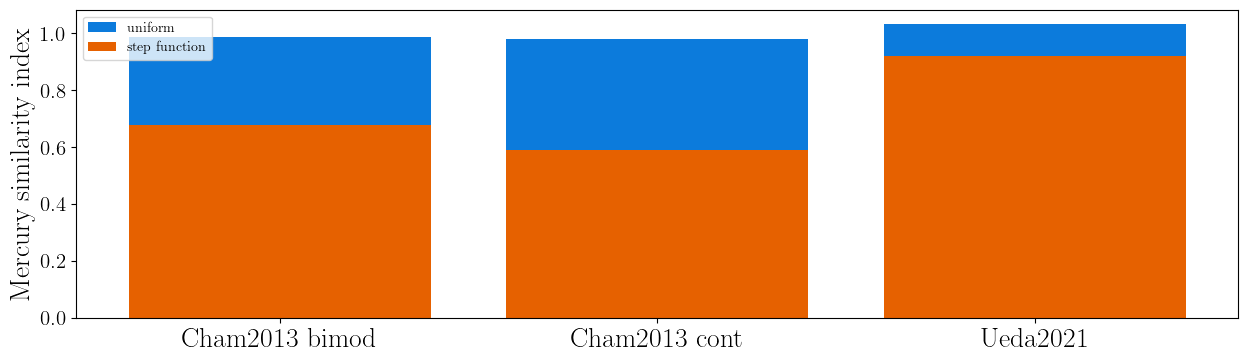

In [180]:
# Bar plot
plt.figure(figsize=(15,4))
plt.bar(uniforms.keys(), uniforms.values(), label = 'uniform', color = colors[0])
plt.bar(steps.keys(), steps.values(), label = 'step function', color = colors[1])

plt.legend()
plt.ylabel("Mercury similarity index")
plt.show()

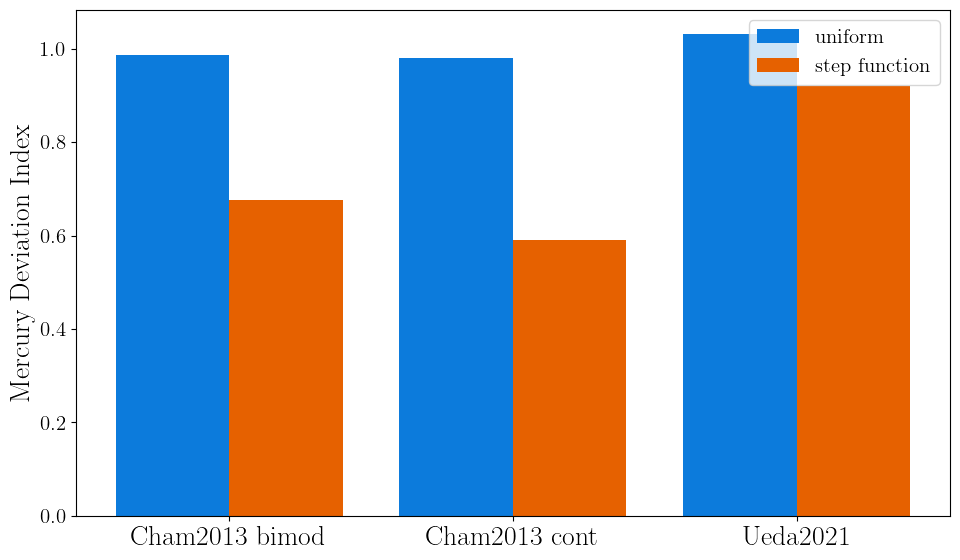

In [181]:
labels = list(uniforms.keys())  # assumes both dicts have same keys in same order
x = np.arange(len(labels))      # numeric positions
width = 0.4                     # width of each bar

plt.figure(figsize=(10,6))
plt.bar(x - width/2, uniforms.values(), width, label='uniform', color=colors[0])
plt.bar(x + width/2, steps.values(), width, label='step function', color=colors[1])

plt.xticks(x, labels)
plt.ylabel("Mercury Deviation Index")
plt.legend(fontsize=15)
plt.tight_layout()

plt.savefig("paper_plots/merc_dev_index.pdf", dpi=30)
plt.show()


# Different plots in the cham_bench grid

In [182]:
bounds = cham_bench_steps['boundary'].unique()
percs = cham_bench_steps['percentage'].unique()

records = []

for bound in bounds:
    for perc in percs:
        df = cham_bench_steps_mercs[
            (cham_bench_steps_mercs['boundary'] == bound) &
            (cham_bench_steps_mercs['percentage'] == perc)
        ]
        dev_index = mercury_sim_index(df['mass'].values * sol_to_earth, df['cmf'].values)
        records.append({'bound': bound, 'perc': perc, 'dev_index': dev_index})

merc_devs_cham_step = pd.DataFrame(records)

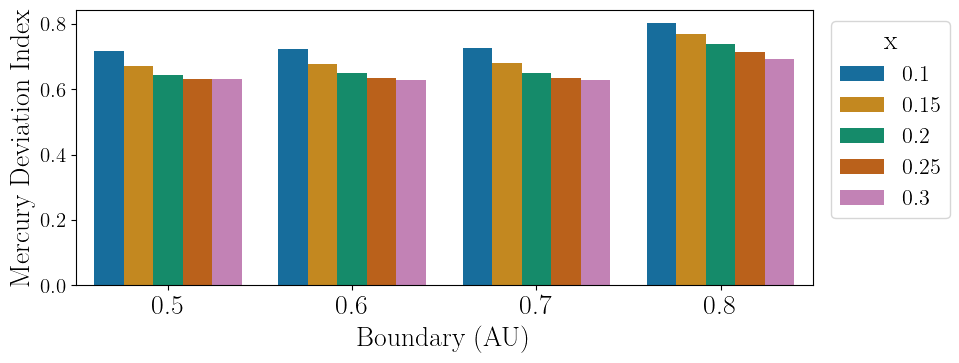

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.barplot(
    data=merc_devs_cham_step,
    x="bound", y="dev_index", hue="perc", palette="colorblind"
)
plt.legend(title="x", bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=16)
#plt.title("Mercury Deviation Index by Boundary and Percentage")
plt.tight_layout()
plt.ylabel("Mercury Deviation Index")
plt.xlabel("Boundary (AU)")
plt.savefig('paper_plots/grid_plot_merc_devs.pdf', dpi=300)
plt.show()


In [184]:
merc_devs_cham_step_sorted = merc_devs_cham_step.sort_values(by="dev_index")
merc_devs_cham_step_sorted

,bound,perc,dev_index
14,0.7,0.30,0.629869
9,0.6,0.30,0.630054
4,0.5,0.30,0.631568
3,0.5,0.25,0.633035
8,0.6,0.25,0.634644
13,0.7,0.25,0.635336
2,0.5,0.20,0.645138
7,0.6,0.20,0.649543
12,0.7,0.20,0.651016
1,0.5,0.15,0.671608


In [185]:
std_devs = merc_devs_cham_step_sorted['dev_index'].std()
std_devs

np.float64(0.05106005273143284)

In [186]:
cham_bench_steps

,Unnamed: 0,hash,mass,cmf,tot_disk_cmf,boundary,percentage,sim_id,semi
0,0,1.000000e+00,7.842082e-07,0.431900,0.33,0.5,0.1,1,0.349708
1,1,2.000000e+00,5.796768e-07,0.557105,0.33,0.5,0.1,1,0.459960
2,2,5.000000e+00,3.638845e-06,0.290364,0.33,0.5,0.1,1,0.773525
3,3,1.200000e+01,1.267064e-06,0.384060,0.33,0.5,0.1,1,1.504560
4,4,1.140000e+02,2.800000e-08,0.297000,0.33,0.5,0.1,1,1.870077
...,...,...,...,...,...,...,...,...,...
4095,4095,1.400000e+02,2.800000e-08,0.231000,0.33,0.8,0.3,53,2.069600
4096,4096,2.875472e+09,1.500960e-08,0.000000,0.33,0.8,0.3,53,5.203767
4097,4097,1.000000e+00,2.081548e-06,0.497590,0.33,0.8,0.3,56,0.408124
4098,4098,4.000000e+00,2.829744e-06,0.319130,0.33,0.8,0.3,56,0.943007


In [164]:
#Other planets
semi_error = 0.02
semi_lower_bound = mercury['a'].values[0] - 0.02
semi_upper_bound = mercury['a'].values[0] + 0.02


cham_bench_venus = cham_bench_steps[(cham_bench_steps['semi'] > venus['a'].values[0] - semi_error ) &
                                   (cham_bench_steps['semi'] < venus['a'].values[0] + semi_error )]

cham_bench_earth = cham_bench_steps[(cham_bench_steps['semi'] > earth['a'].values[0] - semi_error ) &
                                   (cham_bench_steps['semi'] < earth['a'].values[0] + semi_error )]

cham_bench_mars = cham_bench_steps[(cham_bench_steps['semi'] > mars['a'].values[0] - semi_error ) &
                                   (cham_bench_steps['semi'] < mars['a'].values[0] + semi_error )]

# Compute average CMF for each planet's bin
avg_cmf_mercury = cham_bench_steps_mercs['cmf'].mean()
avg_a_mercury = cham_bench_steps_mercs['semi'].mean()
std_cmf_mercury = cham_bench_steps_mercs['cmf'].std()

avg_cmf_venus = cham_bench_venus['cmf'].mean()
avg_a_venus   = cham_bench_venus['semi'].mean()
std_cmf_venus = cham_bench_venus['cmf'].std()

avg_cmf_earth = cham_bench_earth['cmf'].mean()
avg_a_earth = cham_bench_earth['semi'].mean()
std_cmf_earth = cham_bench_earth['cmf'].std()

avg_cmf_mars  = cham_bench_mars['cmf'].mean()
avg_a_mars = cham_bench_mars['semi'].mean()
std_cmf_mars = cham_bench_mars['cmf'].std()

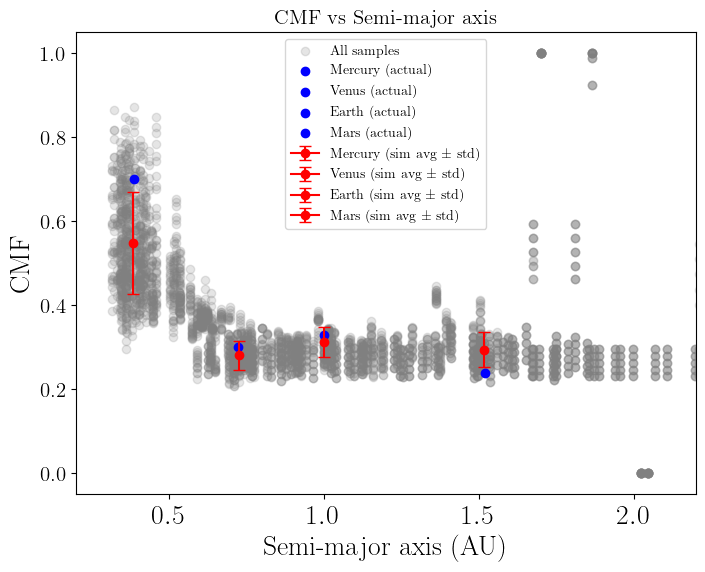

In [165]:
plt.figure(figsize=(8,6))

# Background: all samples
plt.scatter(cham_bench_steps['semi'], cham_bench_steps['cmf'], 
            color='gray', alpha=0.2, label="All samples")

# Mercury
plt.errorbar(avg_a_mercury, avg_cmf_mercury, yerr=std_cmf_mercury, 
             color='red', marker='o', capsize=4, label="Mercury (sim avg ± std)")
plt.scatter(mercury['a'].values[0], mercury['CMF'].values[0], 
            color='blue', marker='o', label="Mercury (actual)")

# Venus
plt.errorbar(avg_a_venus, avg_cmf_venus, yerr=std_cmf_venus, 
             color='red', marker='o', capsize=4, label="Venus (sim avg ± std)")
plt.scatter(venus['a'].values[0], venus['CMF'].values[0], 
            color='blue', marker='o', label="Venus (actual)")

# Earth
plt.errorbar(avg_a_earth, avg_cmf_earth, yerr=std_cmf_earth, 
             color='red', marker='o', capsize=4, label="Earth (sim avg ± std)")
plt.scatter(earth['a'].values[0], earth['CMF'].values[0], 
            color='blue', marker='o', label="Earth (actual)")

# Mars
plt.errorbar(avg_a_mars, avg_cmf_mars, yerr=std_cmf_mars, 
             color='red', marker='o', capsize=4, label="Mars (sim avg ± std)")
plt.scatter(mars['a'].values[0], mars['CMF'].values[0], 
            color='blue', marker='o', label="Mars (actual)")

plt.xlim(0.2, 2.2)
plt.xlabel("Semi-major axis (AU)")
plt.ylabel("CMF")
plt.title("CMF vs Semi-major axis")
plt.legend()
plt.show()


1.2130098636363637e-06
2.1919417625000004e-06
2.4925454000000002e-06
1.0257524000000001e-06


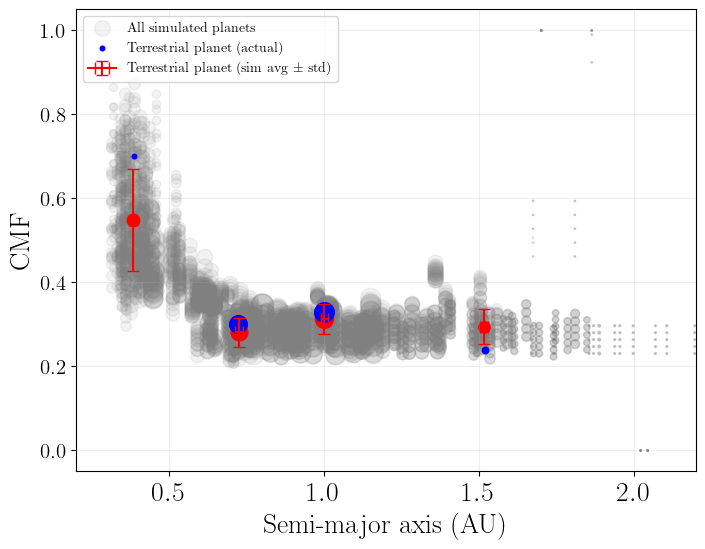

In [166]:
import matplotlib.pyplot as plt

# Define planets in a dict for looping
planets = {
    "Mercury": (mercury, cham_bench_steps_mercs),
    "Venus":   (venus, cham_bench_venus),
    "Earth":   (earth, cham_bench_earth),
    "Mars":    (mars, cham_bench_mars)
}

# Store results
results = {}

for name, (planet_df, sim_df) in planets.items():
    # Handle case-insensitive cmf column
    
    results[name] = {
        "a_avg":  sim_df["semi"].mean(),
        "a_std":  sim_df["semi"].std(),
        "cmf_avg": sim_df['cmf'].mean(),
        "cmf_std": sim_df['cmf'].std(),
        "mass_ave": sim_df['mass'].mean(),
        "a_actual": planet_df["a"].values[0],
        "cmf_actual": planet_df['CMF'].values[0],
        "mass_actual": planet_df['m'].values[0]
    }

# --- Plot ---
plt.figure(figsize=(8,6))

# Background: all samples
plt.scatter(cham_bench_steps['semi'], 
            cham_bench_steps['cmf'], 
            color='gray', alpha=0.1, label="All simulated planets", s = cham_bench_steps['mass'] * sol_to_earth * 200)

# Loop through planets
for i, (name, vals) in enumerate(results.items()):
    # Simulation avg ± std (with errorbars in x and y)
    plt.errorbar(vals["a_avg"], vals["cmf_avg"],
                 xerr=vals["a_std"], yerr=vals["cmf_std"],
                 fmt='', color='red', capsize=4, 
                 label=f"Terrestrial planet (sim avg ± std)" if i==0 else None)
    plt.scatter(vals["a_avg"], vals["cmf_avg"], s = vals["mass_ave"] * sol_to_earth * 200, color = 'red')
    print(vals["mass_ave"])
    
    # Actual planet
    plt.scatter(vals["a_actual"], vals["cmf_actual"],
                color='blue', marker='o', s = vals['mass_actual'] * 200,
                label=f"Terrestrial planet (actual)" if i==0 else None)

plt.grid('True', alpha = 0.2)
plt.xlim(0.2, 2.2)
plt.xlabel("Semi-major axis (AU)")
plt.ylabel("CMF")
plt.legend()
plt.show()


In [167]:
len(cham_bench_mercs)

5